# SDG

Read html table using `pandas` `read_html`.

In [52]:
import pandas as pd

let us download country list and their iso 3 alpha codes

In [169]:
url = 'http://www.nationsonline.org/oneworld/country_code_list.htm'
country_codes = pd.read_html(url)
country_codes = country_codes[2]

In [171]:
country_codes.head()

,0,1,2,3,4
0,NaN,Country or Area Name,"ISO ""ALPHA-2 Code",ISO ALPHA-3 Code,ISO Numeric Code UN M49 Numerical Code
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Afghanistan,AF,AFG,004
3,NaN,Aland Islands,AX,ALA,248
4,NaN,Albania,AL,ALB,008


In [172]:
country_codes.columns = country_codes.iloc[0]
country_codes= country_codes.loc[2:, ['Country or Area Name', 'ISO ALPHA-3 Code']]

In [173]:
country_codes.head()

,Country or Area Name,ISO ALPHA-3 Code
2,Afghanistan,AFG
3,Aland Islands,ALA
4,Albania,ALB
5,Algeria,DZA
6,American Samoa,ASM


In [104]:
url = 'http://www.nationsonline.org/oneworld/country_code_list.htm'
country_codes = pd.read_html(url)
country_codes = country_codes[2]
country_codes.columns = country_codes.iloc[0]
country_codes= country_codes.loc[2:, ['Country or Area Name', 'ISO ALPHA-3 Code']]
country_codes.reset_index(drop=True,inplace=True)
country_codes.columns = ['country', 'code']

In [174]:
country_codes.reset_index(drop=True,inplace=True)
country_codes.columns = ['country', 'code']

In [175]:
country_codes.head()

,country,code
0,Afghanistan,AFG
1,Aland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


We need to shift the column headings and re_index as guided by [this stackoverflow](https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe) post

In [108]:
def get_code(country):
    return country_codes.loc[country_codes.country==country,'code'].values[0]

In [109]:
get_code('Bangladesh')

'BGD'

In [176]:
url = 'https://unstats.un.org/sdgs/indicators/database/?area=' + get_code('Bangladesh')
data = pd.read_html(url)

Returns a list of dataframes, so let us grab the first table which contains our interested dataset.

In [177]:
data = data[0]

In [178]:
data.head()

,Goal,Target,Indicator Ref,IndicatorId,Indicator Description,Series Code,Series Type,Series Description,Parent Country or Area Code,Country or Area Code,...,2012,FN.26,2013,FN.27,2014,FN.28,2015,FN.29,2016,FN.30
0,1,1.1,1.1.1,C010101,Proportion of population below the internation...,SI_POV_DAY1,SD,Proportion of population below the internation...,MDG_SAS,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.1,1.1.1,C010101,Proportion of population below the internation...,SI_POV_EMP1,SD,Proportion of employed population below the in...,MDG_SAS,BGD,...,72.62,"M, 23, 78",71.12,"M, 24, 78",69.41,"M, 25, 78",67.45,"M, 26, 78",65.18,"M, 27, 78"
2,1,1.1,1.1.1,C010101,Proportion of population below the internation...,SI_POV_EMP1,SD,Proportion of employed population below the in...,MDG_SAS,BGD,...,74.91,"M, 23, 78",73.58,"M, 24, 78",72.00,"M, 25, 78",70.12,"M, 26, 78",67.93,"M, 27, 78"
3,1,1.1,1.1.1,C010101,Proportion of population below the internation...,SI_POV_EMP1,SD,Proportion of employed population below the in...,MDG_SAS,BGD,...,71.35,"M, 23, 78",69.76,"M, 24, 78",67.98,"M, 25, 78",65.98,"M, 26, 78",63.68,"M, 27, 78"
4,1,1.1,1.1.1,C010101,Proportion of population below the internation...,SI_POV_EMP1,SD,Proportion of employed population below the in...,MDG_SAS,BGD,...,71.46,"M, 23, 78",69.94,"M, 24, 78",68.20,"M, 25, 78",66.20,"M, 26, 78",63.87,"M, 27, 78"


In [ ]:
data.shape

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 84 columns):
Goal                           395 non-null int64
Target                         395 non-null object
Indicator Ref                  395 non-null object
IndicatorId                    395 non-null object
Indicator Description          395 non-null object
Series Code                    395 non-null object
Series Type                    395 non-null object
Series Description             395 non-null object
Parent Country or Area Code    395 non-null object
Country or Area Code           395 non-null object
Country or Area Name           395 non-null object
LDC                            395 non-null bool
LLDC                           0 non-null float64
SIDS                           0 non-null float64
Frequency                      395 non-null object
Source type                    395 non-null object
Age group                      395 non-null object
Location                       39

In [180]:
keep_cols = [c for c in data.columns if c[:2] != 'FN']
data = data[keep_cols]

In [181]:
data = data[keep_cols]

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 53 columns):
Goal                           395 non-null int64
Target                         395 non-null object
Indicator Ref                  395 non-null object
IndicatorId                    395 non-null object
Indicator Description          395 non-null object
Series Code                    395 non-null object
Series Type                    395 non-null object
Series Description             395 non-null object
Parent Country or Area Code    395 non-null object
Country or Area Code           395 non-null object
Country or Area Name           395 non-null object
LDC                            395 non-null bool
LLDC                           0 non-null float64
SIDS                           0 non-null float64
Frequency                      395 non-null object
Source type                    395 non-null object
Age group                      395 non-null object
Location                       39

In [183]:
id_cols = data.columns[:22]

In [184]:
id_cols

Index(['Goal', 'Target', 'Indicator Ref', 'IndicatorId',
       'Indicator Description', 'Series Code', 'Series Type',
       'Series Description', 'Parent Country or Area Code',
       'Country or Area Code', 'Country or Area Name', 'LDC', 'LLDC', 'SIDS',
       'Frequency', 'Source type', 'Age group', 'Location', 'Sex',
       'Value type', 'Unit', 'Unit multiplier'],
      dtype='object')

In [185]:
data3 = pd.melt(data, id_vars=id_cols, var_name='Year', value_name='value')

In [189]:
data3.head()

,Goal,Target,Indicator Ref,IndicatorId,Indicator Description,Series Code,Series Type,Series Description,Parent Country or Area Code,Country or Area Code,...,Frequency,Source type,Age group,Location,Sex,Value type,Unit,Unit multiplier,Year,value
0,1,1.1,1.1.1,C010101,Proportion of population below the internation...,SI_POV_DAY1,SD,Proportion of population below the internation...,MDG_SAS,BGD,...,Annual,Not available,All age ranges or no breakdown by age,Total (national level),Both sexes or no breakdown by sex,NaN,Percent,Units,1986,NaN
1,1,1.1,1.1.1,C010101,Proportion of population below the internation...,SI_POV_EMP1,SD,Proportion of employed population below the in...,MDG_SAS,BGD,...,Annual,Not available,15 to 24 years old,Total (national level),Both sexes or no breakdown by sex,NaN,Percent,Units,1986,NaN
2,1,1.1,1.1.1,C010101,Proportion of population below the internation...,SI_POV_EMP1,SD,Proportion of employed population below the in...,MDG_SAS,BGD,...,Annual,Not available,15 to 24 years old,Total (national level),Female,NaN,Percent,Units,1986,NaN
3,1,1.1,1.1.1,C010101,Proportion of population below the internation...,SI_POV_EMP1,SD,Proportion of employed population below the in...,MDG_SAS,BGD,...,Annual,Not available,15 to 24 years old,Total (national level),Male,NaN,Percent,Units,1986,NaN
4,1,1.1,1.1.1,C010101,Proportion of population below the internation...,SI_POV_EMP1,SD,Proportion of employed population below the in...,MDG_SAS,BGD,...,Annual,Not available,15 years old and over,Total (national level),Both sexes or no breakdown by sex,NaN,Percent,Units,1986,NaN


In [ ]:
data3.shape

In [ ]:
data3.info()

In [201]:
data3 = data3[['Goal', 'Series Code', 'Series Description', 'Value type','Unit', 'Year', 'value']]

In [202]:
data3.loc[data3['value']=='<0.01']

,Goal,Series Code,Series Description,Value type,Unit,Year,value


In [203]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12245 entries, 0 to 12244
Data columns (total 7 columns):
Goal                  12245 non-null int64
Series Code           12245 non-null object
Series Description    12245 non-null object
Value type            310 non-null object
Unit                  12245 non-null object
Year                  12245 non-null object
value                 2405 non-null object
dtypes: int64(1), object(6)
memory usage: 669.7+ KB


`value` should be numeric. I downloaded a csv version and notices that there are 20 records that lists values as '<0.01' which rendered the entire column as object

Let us capture those instances and replace the value of '<0.01' to '0.009'

In [204]:
data3['value']=[x.replace('<0.01','0.009') if isinstance(x,str) else x for x in data3['value'].values ]

Now we can safely do a `to_numeric` on values

In [ ]:
data3['value'] = pd.to_numeric(data3['value'])

In [205]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12245 entries, 0 to 12244
Data columns (total 7 columns):
Goal                  12245 non-null int64
Series Code           12245 non-null object
Series Description    12245 non-null object
Value type            310 non-null object
Unit                  12245 non-null object
Year                  12245 non-null object
value                 2405 non-null object
dtypes: int64(1), object(6)
memory usage: 669.7+ KB


In [215]:
data3.loc[data3['Value type'].notnull() & data3['value'].notnull()]

,Goal,Series Code,Series Description,Value type,Unit,Year,value
1629,3,SH_STA_MORT,Maternal mortality ratio,Lower bound,"Per 100,000 live births",1990,446
1630,3,SH_STA_MORT,Maternal mortality ratio,Upper bound,"Per 100,000 live births",1990,715
2024,3,SH_STA_MORT,Maternal mortality ratio,Lower bound,"Per 100,000 live births",1991,435
2025,3,SH_STA_MORT,Maternal mortality ratio,Upper bound,"Per 100,000 live births",1991,689
2419,3,SH_STA_MORT,Maternal mortality ratio,Lower bound,"Per 100,000 live births",1992,422
2420,3,SH_STA_MORT,Maternal mortality ratio,Upper bound,"Per 100,000 live births",1992,660
2814,3,SH_STA_MORT,Maternal mortality ratio,Lower bound,"Per 100,000 live births",1993,413
2815,3,SH_STA_MORT,Maternal mortality ratio,Upper bound,"Per 100,000 live births",1993,633
3098,15,ER_RSK_LST,Red List Index,Lower bound,Not applicable,1993,0.85
3099,15,ER_RSK_LST,Red List Index,Upper bound,Not applicable,1993,0.85


By now we have a data frame that should be ready for drawing trend lines. 

In [216]:
def sdg_country(country_code):
    import pandas as pd
    url = 'https://unstats.un.org/sdgs/indicators/database/?area=' + country_code
    data = pd.read_html(url)[0]
    
    #get rid of footnotes
    keep_cols = [c for c in data.columns if c[:2] != 'FN']
    data = data[keep_cols]
    
    #melt 
    ##identify the cols of ids
    id_cols = data.columns[:22]
    ##melt
    data = pd.melt(data, id_vars=id_cols, var_name='Year', value_name='value')
    
    #drop columns I am not intersted in
    data = data[['Goal', 'Series Code', 'Series Description', 'Value type','Unit', 'Year', 'value']]
    
    #convert any non numeric
    data['value']=[x.replace('<','') if isinstance(x,str) else x for x in data['value'].values ]
    data['value']=[x.replace('>','') if isinstance(x,str) else x for x in data['value'].values ]
    data['value'] = pd.to_numeric(data['value'])
    
    #find the mean of upper and lower if any and drop the column called value type and remove duplicates
    data['value'] = data.groupby(['Series Code','Year'])['value'].transform('mean')
    data.drop('Value type', axis=1, inplace=True)
    data.drop_duplicates(['Series Code','Year', 'value'], inplace=True)
    
    return data

In [217]:
bdg = sdg_country('BGD')

In [218]:
bdg

,Goal,Series Code,Series Description,Unit,Year,value
0,1,SI_POV_DAY1,Proportion of population below the internation...,Percent,1986,NaN
1,1,SI_POV_EMP1,Proportion of employed population below the in...,Percent,1986,NaN
10,1,SI_POV_NAHC,Proportion of population below national povert...,Percent,1986,NaN
13,1,SI_COV_CHLD,Proportion of children covered by social prote...,Percent,1986,NaN
14,1,SI_COV_DISAB,Proportion of population with severe disabilit...,Percent,1986,NaN
15,1,SI_COV_LMKT,Proportion of the population covered by labour...,Percent,1986,NaN
16,1,SI_COV_LMKTPQ,Proportion of the poorest quintile population ...,Percent,1986,NaN
17,1,SI_COV_MATNL,Proportion of mothers receiving maternity bene...,Percent,1986,NaN
19,1,SI_COV_PENSN,Proportion of population above retirement age ...,Percent,1986,NaN
20,1,SI_COV_POOR,Proportion of poor population covered by socia...,Percent,1986,NaN


In [222]:
list_indicators(bdg,9)

,Series Code,Series Description
254,IS_RDP_FRGHTKM,"Freight volume (tonne kilometres), by road tra..."
255,IS_RDP_PSSGRKM,"Passenger volume (passenger kilometres), by ro..."
256,IS_RRS_FRGHTKM,"Freight volume (tonne kilometres), by rail tra..."
257,IS_RRS_PSSGRKM,"Passenger volume (passenger kilometres), by ra..."
258,IS_TRP_FRGHT,"Freight volume, by air transport"
259,IS_TRP_FRGHTKM,"Freight volume (tonne kilometres), by air tran..."
260,IS_TRP_MAILTKM,"Mail volume (tonne kilometres), by air transport"
261,IS_TRP_PSSGR,"Passenger volume, by air transport"
262,IS_TRP_PSSGRKM,"Passenger volume (passenger kilometres), by ai..."
263,NV_IND_MANF,Manufacturing value added share in GDP at cons...


In [223]:
indicator_data(bdg,'IT_MOB_4GNTWK')

(array(['1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
        '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
        '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', '2014', '2015', '2016'], dtype=object),
 array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  59.,  65.,  nan]),
 'Proportion of population covered by at least a 4G mobile network',
 'Percent')

In [ ]:
def plot_indicator(df, indicator_code):
    res = df.loc[df['Series Code']==indicator_code]
    import matplotlib.pyplot as plt
    %matplotlib inline
    ax = res.plot(x='Year', y='value', title = res['Series Description'].values[0], legend=False)
    ax.set(ylabel=res['Unit'].values[0])

In [136]:
def indicator_data(df, indicator_code):
    res = df.loc[df['Series Code']==indicator_code]
    return (res['Year'].values,res['value'].values, res['Series Description'].values[0], res['Unit'].values[0])

In [5]:
def list_indicators(df, goal=1):
    res = df.loc[df.Goal==goal,['Series Code', 'Series Description']]
    res.drop_duplicates(inplace=True)
    return res

Got help from [this](https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/markevery_demo.html#sphx-glr-gallery-lines-bars-and-markers-markevery-demo-py) site

In [165]:
def plot_goal(df,goal,country):    
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    res = list_indicators(df,goal)
    figsize = (15, len(res)*2)
    cols = 2
    gs = gridspec.GridSpec(len(res) // cols + 1, cols)
    gs.update(hspace=0.4)
    fig1 = plt.figure(num=1, figsize=figsize)
    ax = []
    i=0
    for ind, rec in res.iterrows():
        row = (i // cols)
        col = i % cols
        x,y,t,l = indicator_data(df, rec['Series Code'])
        if (len(t)>60):
            t = t[:60] #cut off long titles
        if len(x)>0:
            ax.append(fig1.add_subplot(gs[row, col]))
            ax[-1].set_title(t)
            ax[-1].plot(x, y)
            ax[-1].set_ylabel(l)
            i = i+1
    plt.suptitle("Goal %d for %s" % (goal,country))
    plt.show()

In [110]:
def sdg_country_plot(country,goal):
    c_code = get_code(country)
    data = sdg_country(c_code)
    plot_goal(data,goal,country)

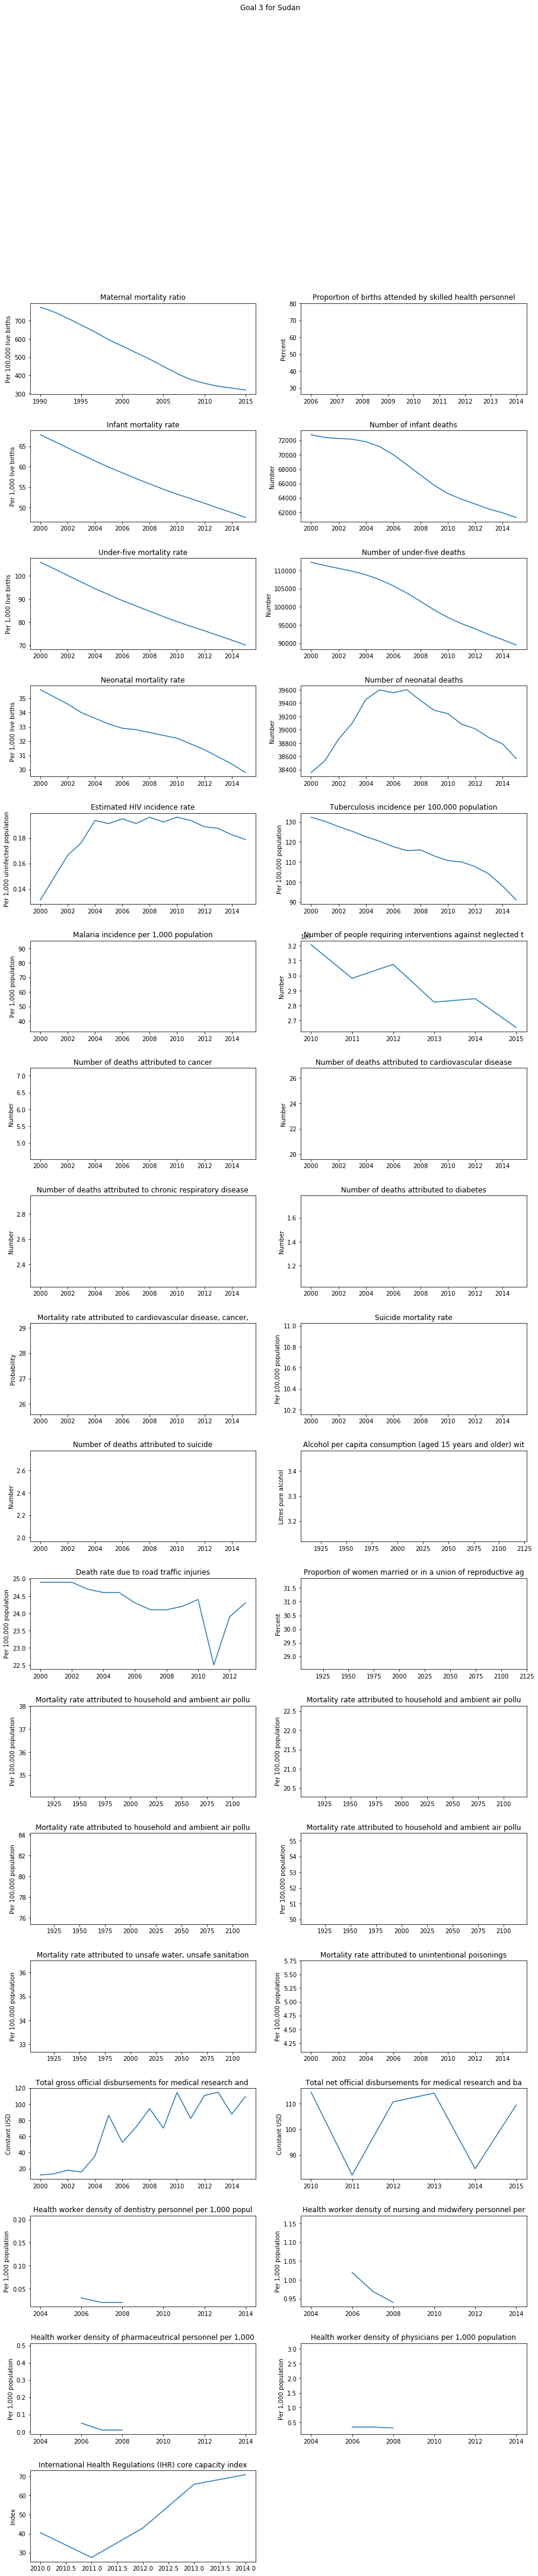

In [221]:
sdg_country_plot('Sudan',3)